### Proje 3. Siniflandirma

Koronavirus verisi analizi: https://github.com/Atharva-Peshkar/Covid-19-Patient-Health-Analytics

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }

In [21]:
covid = pd.read_csv('data.csv')
covid.tail()

,id,location,country,gender,age,sym_on,hosp_vis,vis_wuhan,from_wuhan,death,recov,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6
1080,1081,Innsbruck,Austria,NaN,24.0,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1081,1082,Afghanistan,Afghanistan,NaN,35.0,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1082,1083,Algeria,Algeria,male,NaN,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1083,1084,Croatia,Croatia,male,NaN,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1084,1085,Bern,Switzerland,male,70.0,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          1085 non-null   int64  
 1   location    1085 non-null   object 
 2   country     1085 non-null   object 
 3   gender      902 non-null    object 
 4   age         843 non-null    float64
 5   sym_on      449 non-null    object 
 6   hosp_vis    449 non-null    object 
 7   vis_wuhan   1085 non-null   int64  
 8   from_wuhan  1081 non-null   float64
 9   death       1085 non-null   int64  
 10  recov       1085 non-null   int64  
 11  symptom1    270 non-null    object 
 12  symptom2    161 non-null    object 
 13  symptom3    73 non-null     object 
 14  symptom4    19 non-null     object 
 15  symptom5    3 non-null      object 
 16  symptom6    1 non-null      object 
dtypes: float64(2), int64(4), object(11)
memory usage: 144.2+ KB


In [23]:
covid.nunique()

id            1085
location       156
country         38
gender           2
age             85
sym_on          60
hosp_vis        58
vis_wuhan        2
from_wuhan       2
death            2
recov            2
symptom1        27
symptom2        31
symptom3        23
symptom4        12
symptom5         3
symptom6         1
dtype: int64

semptomlarin oldugu sutunlarda cok fazla kayip deger var. Ayrica bunlarin gercekten kayip deger olup olmadigi veya o semptomu gosterip gostermediginin bir isareti mi oldugu bilgisi de verilmemis. Verilen cok az bilgi icinde cok farkli secenekler de bulunuyor. Bu sebeple semptomlarin oldugu sutunlari calismadan cikaracagim.

Ayni sekilde sym_on ve hosp_visit sutunlarini da cok fazla kayip veri oldugu icin cikariyorum. Location bilgisinde cok fazla secenek var. Simdilik onu cikarip country sutununu tutarak ilerleyecegim.

Bir de elimizdeki veride cok fazla covid'den olmeyen kisi bilgisi var ve bu sebeple recovery sutunu cok fazla isime yaramiyor. Zaten hedef degisken olarak 'death' sutununu sececegim icin recovery sutununu de cikaracagim.

In [24]:
covid = covid.drop(['symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','sym_on','hosp_vis',
                   'id','location','recov'], axis=1)

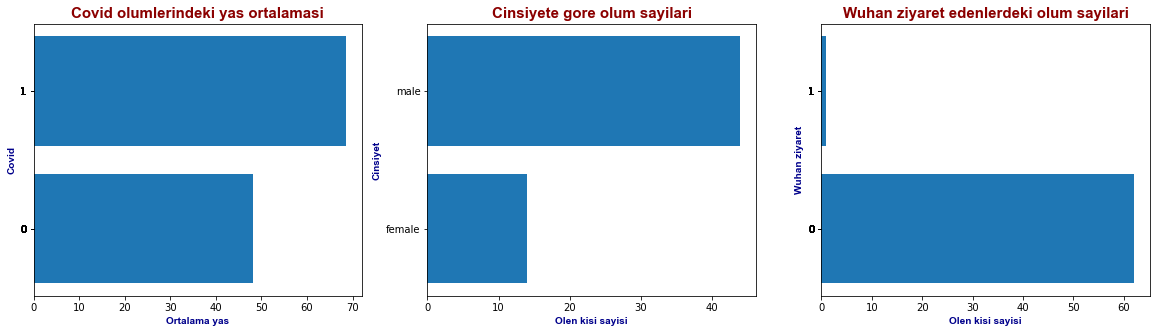

In [25]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.barh(covid.groupby("death")["age"].mean().index, 
        covid.groupby("death")["age"].mean())
plt.title("Covid olumlerindeki yas ortalamasi", fontdict=baslik_font)
plt.xlabel('Ortalama yas', fontdict=eksen_font)
plt.ylabel('Covid', fontdict=eksen_font)
plt.yticks(covid.death)

plt.subplot(1,3,2)
plt.barh(covid.groupby("gender")["death"].sum().index, 
        covid.groupby("gender")["death"].sum())
plt.title("Cinsiyete gore olum sayilari", fontdict=baslik_font)
plt.xlabel('Olen kisi sayisi', fontdict=eksen_font)
plt.ylabel('Cinsiyet', fontdict=eksen_font)

plt.subplot(1,3,3)
plt.barh(covid.groupby("vis_wuhan")["death"].sum().index, 
        covid.groupby("vis_wuhan")["death"].sum())
plt.title("Wuhan ziyaret edenlerdeki olum sayilari", fontdict=baslik_font)
plt.xlabel('Olen kisi sayisi', fontdict=eksen_font)
plt.ylabel('Wuhan ziyaret', fontdict=eksen_font)
plt.yticks(covid.vis_wuhan)

plt.show()

(array([ 19.,  13.,  85., 146., 127., 169., 144.,  93.,  41.,   6.]),
 array([ 0.25 ,  9.825, 19.4  , 28.975, 38.55 , 48.125, 57.7  , 67.275,
        76.85 , 86.425, 96.   ]),
 <BarContainer object of 10 artists>)

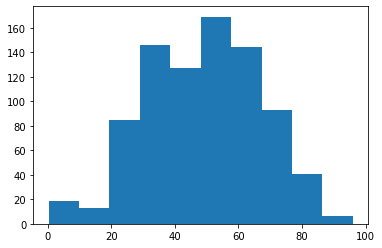

In [26]:
plt.hist(covid.age)

In [27]:
covid = pd.get_dummies(data=covid, columns=['country', 'gender'])

In [28]:
covid = covid.dropna()

In [29]:
print(covid.shape)

(839, 44)


Yukaridaki grafiklere baktigimizda: elimizdeki veriye gore Covid'den dolayi olumlerde yas ortalamasi daha yuksek olanlari goruyoruz. Ayni sekilde erkeklerde de olum sayilari daha yuksek. Fakat, elimizdeki veri cok genel oldugu icin olu sayilarinda Wuhan ziyaretinin etkisinin daha az olmasi normal karsilanabilir.

Ulke icin cok fazla secenek var ama hizlica hangi ulkelerde goruldugune bakmak icin ulke ve cinsiyet sutunlarini get_dummies ile aciyoruz.

In [30]:
covid.corr()

,age,vis_wuhan,from_wuhan,death,country_Afghanistan,country_Algeria,country_Australia,country_Austria,country_Bahrain,country_Belgium,...,country_Sweden,country_Switzerland,country_Taiwan,country_Thailand,country_UAE,country_UK,country_USA,country_Vietnam,gender_female,gender_male
age,1.000000,-0.191637,0.066846,0.285153,-0.027613,NaN,-0.055948,-0.068624,NaN,NaN,...,-0.046597,0.038831,0.025725,-0.011221,-0.027920,0.006558,0.002119,-0.078589,0.007406,0.022446
vis_wuhan,-0.191637,1.000000,-0.208654,-0.113242,-0.015921,NaN,0.079783,-0.022530,NaN,NaN,...,0.074950,-0.015921,0.026071,-0.003327,-0.047994,-0.015921,0.109721,0.007163,-0.043276,0.056610
from_wuhan,0.066846,-0.208654,1.000000,0.286581,-0.016249,NaN,0.123365,-0.022993,NaN,NaN,...,-0.016249,-0.016249,-0.042919,0.079856,0.071180,-0.016249,-0.039921,-0.023146,0.038548,-0.030422
death,0.285153,-0.113242,0.286581,1.000000,-0.009414,NaN,-0.036768,-0.013321,NaN,NaN,...,-0.009414,-0.009414,-0.028470,-0.040351,-0.028377,-0.009414,-0.023128,-0.029930,-0.095292,0.106454
country_Afghanistan,-0.027613,-0.015921,-0.016249,-0.009414,1.000000,NaN,-0.004661,-0.001689,NaN,NaN,...,-0.001193,-0.001193,-0.006766,-0.005115,-0.003597,-0.001193,-0.002932,-0.003794,-0.029011,-0.039366
country_Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_Australia,-0.055948,0.079783,0.123365,-0.036768,-0.004661,NaN,1.000000,-0.006595,NaN,NaN,...,-0.004661,-0.004661,-0.026428,-0.019978,-0.014050,-0.004661,-0.011451,-0.014819,-0.003723,0.009537
country_Austria,-0.068624,-0.022530,-0.022993,-0.013321,-0.001689,NaN,-0.006595,1.000000,NaN,NaN,...,-0.001689,-0.001689,-0.009575,-0.007238,-0.005090,-0.001689,-0.004149,-0.005369,-0.041052,-0.055705
country_Bahrain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Genel olarak tum degiskenlerin olum sayilari uzerindeki etkileri cok dusuk cikmis olsa da 0.1 ve uzeri olanlari modelim icin tutacagim.

In [31]:
# ilk modelimiz:

X = covid[['age','from_wuhan','country_China','gender_male']]
Y = covid.death
X_egitim,X_test,Y_egitim,Y_test = train_test_split (X,Y,test_size=0.20,random_state=111)

covid_tahmin_modeli1 = LogisticRegression()
covid_tahmin_modeli1.fit(X_egitim, Y_egitim)

tahmin_egitim1 = covid_tahmin_modeli1.predict(X_egitim)
tahmin_test1 = covid_tahmin_modeli1.predict(X_test)

hata_matrisi_eğitim1 = confusion_matrix(Y_egitim, tahmin_egitim1)
hata_matrisi_test1 = confusion_matrix(Y_test, tahmin_test1)

print("Modelin dogruluk degeri : ",  covid_tahmin_modeli1.score(X_test, Y_test))
print("Egitim veri kümesi")
print(classification_report(Y_egitim,tahmin_egitim1) )
print("Test veri kümesi")
print(classification_report(Y_test,tahmin_test1) )

Modelin dogruluk degeri :  0.9404761904761905
Egitim veri kümesi
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       623
           1       0.83      0.42      0.56        48

    accuracy                           0.95       671
   macro avg       0.90      0.71      0.77       671
weighted avg       0.95      0.95      0.94       671

Test veri kümesi
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       158
           1       0.50      0.40      0.44        10

    accuracy                           0.94       168
   macro avg       0.73      0.69      0.71       168
weighted avg       0.93      0.94      0.94       168



Yukaridaki modelimize baktigimizda her ne kadar accuracy 0.94 ciksa da precision ve recall degerleri cok dusuk. Bunun sebebi elimizde siniflarin dengesizliginden olabilir.

Olum orani : %6.91
Saglikli orani    : %93.09


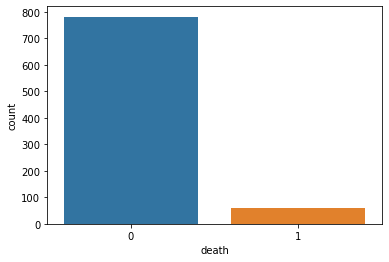

In [32]:
sns.countplot(covid.death)
print("Olum orani : %{:.2f}".format(sum(covid.death)/len(covid.death)*100))
print("Saglikli orani    : %{:.2f}".format((len(covid.death)-sum(covid.death))/len(covid.death)*100))

Sinif dengesizliginin onlemek icin orneklem sayilarini degistirerek yeniden deneyecegim. Burada orneklem arttirma, SMOTE ve ADAYSN metodlarini deneyecegim. Elimdeki olu sayisi cok az oldugu icin orneklem azaltmayi denemeyecegim.

In [35]:
# Orneklem arttirma 

from sklearn.utils import resample

healthy = covid[covid.death == 0]
deaths = covid[covid.death == 1]

covid_artirilmis = resample(deaths,replace = True,n_samples = len(healthy),random_state = 111)

artirilmis_covid = pd.concat([healthy, covid_artirilmis])
artirilmis_covid.death.value_counts()

1    781
0    781
Name: death, dtype: int64

In [36]:
# Orneklem arttirma sonrasi ikinci modelimiz: 

X = artirilmis_covid[['age','from_wuhan','country_China','gender_male']]
Y = artirilmis_covid.death
X_egitim,X_test,Y_egitim,Y_test = train_test_split (X,Y,test_size=0.20,random_state=111)

covid_tahmin_modeli2 = LogisticRegression()
covid_tahmin_modeli2.fit(X_egitim, Y_egitim)

tahmin_egitim2 = covid_tahmin_modeli2.predict(X_egitim)
tahmin_test2 = covid_tahmin_modeli2.predict(X_test)

hata_matrisi_eğitim2 = confusion_matrix(Y_egitim, tahmin_egitim2)
hata_matrisi_test2 = confusion_matrix(Y_test, tahmin_test2)

print("Modelin dogruluk degeri : ",  covid_tahmin_modeli2.score(X_test, Y_test))
print("Egitim veri kümesi")
print(classification_report(Y_egitim,tahmin_egitim2) )
print("Test veri kümesi")
print(classification_report(Y_test,tahmin_test2) )

Modelin dogruluk degeri :  0.7891373801916933
Egitim veri kümesi
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       629
           1       0.82      0.79      0.80       620

    accuracy                           0.81      1249
   macro avg       0.81      0.81      0.81      1249
weighted avg       0.81      0.81      0.81      1249

Test veri kümesi
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       152
           1       0.81      0.76      0.79       161

    accuracy                           0.79       313
   macro avg       0.79      0.79      0.79       313
weighted avg       0.79      0.79      0.79       313



In [39]:
# SMOTE ile ucuncu modelimiz:

from imblearn.over_sampling import SMOTE

X = covid[['age','from_wuhan','country_China','gender_male']]
Y = covid.death

sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_smote, Y_smote = sm.fit_resample(X, Y)
X_egitim,X_test,Y_egitim,Y_test = train_test_split (X_smote,Y_smote,test_size=0.20,random_state=111)

covid_tahmin_modeli3 = LogisticRegression()
covid_tahmin_modeli3.fit(X_egitim, Y_egitim)

tahmin_egitim3 = covid_tahmin_modeli3.predict(X_egitim)
tahmin_test3 = covid_tahmin_modeli3.predict(X_test)

hata_matrisi_eğitim3 = confusion_matrix(Y_egitim, tahmin_egitim3)
hata_matrisi_test3 = confusion_matrix(Y_test, tahmin_test3)

print("Modelin dogruluk degeri : ",  covid_tahmin_modeli3.score(X_test, Y_test))
print("Egitim veri kümesi")
print(classification_report(Y_egitim,tahmin_egitim3) )
print("Test veri kümesi")
print(classification_report(Y_test,tahmin_test3) )

Modelin dogruluk degeri :  0.792332268370607
Egitim veri kümesi
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       629
           1       0.79      0.77      0.78       620

    accuracy                           0.79      1249
   macro avg       0.79      0.79      0.79      1249
weighted avg       0.79      0.79      0.79      1249

Test veri kümesi
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       152
           1       0.83      0.75      0.79       161

    accuracy                           0.79       313
   macro avg       0.79      0.79      0.79       313
weighted avg       0.80      0.79      0.79       313



In [40]:
# ADASYN ile dorduncu modelimiz:

from imblearn.over_sampling import ADASYN

X = covid[['age','from_wuhan','country_China','gender_male']]
Y = covid.death

ad = ADASYN()
X_adasyn, Y_adasyn = ad.fit_resample(X, Y)
X_egitim,X_test,Y_egitim,Y_test = train_test_split (X_adasyn, Y_adasyn,test_size=0.20,random_state=111)

covid_tahmin_modeli4 = LogisticRegression()
covid_tahmin_modeli4.fit(X_egitim, Y_egitim)

tahmin_egitim4 = covid_tahmin_modeli4.predict(X_egitim)
tahmin_test4 = covid_tahmin_modeli4.predict(X_test)

hata_matrisi_eğitim4 = confusion_matrix(Y_egitim, tahmin_egitim4)
hata_matrisi_test4 = confusion_matrix(Y_test, tahmin_test4)

print("Modelin dogruluk degeri : ",  covid_tahmin_modeli4.score(X_test, Y_test))
print("Egitim veri kümesi")
print(classification_report(Y_egitim,tahmin_egitim4) )
print("Test veri kümesi")
print(classification_report(Y_test,tahmin_test4) )

Modelin dogruluk degeri :  0.7339743589743589
Egitim veri kümesi
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       625
           1       0.77      0.76      0.76       622

    accuracy                           0.77      1247
   macro avg       0.77      0.77      0.77      1247
weighted avg       0.77      0.77      0.77      1247

Test veri kümesi
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       156
           1       0.73      0.75      0.74       156

    accuracy                           0.73       312
   macro avg       0.73      0.73      0.73       312
weighted avg       0.73      0.73      0.73       312



Yukarida da gorulebilecegi gibi uc yontemden en iyi sonucu aldigimiz orneklem arttima ve SMOTE oldu. 

In [52]:
tahmin_degerleri = np.array([[66,0,1,1] , [56,1,1,0], [46,1,1,0]])
print(covid_tahmin_modeli3.predict(tahmin_degerleri))

[1 1 1]


In [53]:
tahmin_degerleri = np.array([[66,0,1,1] , [56,1,1,0], [46,1,1,0]])
print(covid_tahmin_modeli2.predict(tahmin_degerleri))

[1 1 0]


In [54]:
tahmin_degerleri = np.array([[66,0,1,1] , [56,1,1,0], [46,1,1,0]])
print(covid_tahmin_modeli1.predict(tahmin_degerleri))

[0 0 0]


asagidaki tablodan ilk uc satirin verilerine gore sonuclarini tahmin etmeye calistim. Simdilik ilk denedigim model 3 secenegi de dogru tahmin etti.

In [46]:
covid1 = covid[['age','from_wuhan','country_China','gender_male','death']]

In [47]:
covid1.head()

,age,from_wuhan,country_China,gender_male,death
0,66.0,0.0,1,1,0
1,56.0,1.0,1,0,0
2,46.0,1.0,1,1,0
3,60.0,0.0,1,0,0
4,58.0,0.0,1,1,0
